# 초급자를 위한 손에 잡히는 딥러닝 (상세 설명 버전)
> 원본 자료에 초심자를 위한 추가 설명과 예시를 더한 버전입니다.

- toc: true
- branch: master
- badges: true
- comments: true
- author: 이호준 (추가 설명 버전)
- categories: [TensorFlow, deep learning, 선형회귀]

## 📚 시작하기 전에 - 이 강의에서 배울 내용

### 🎯 수강 대상
* 인공지능, 머신러닝, 딥러닝에 대한 이해가 전혀 없으나 배워보고 싶으신 분
* 데이터 분석에 대한 이해가 전혀 없으신 분
* Python에 대한 이해가 없으신 분
* 빠른 시간 내 훑어보시길 원하시는 분

### 💡 초심자를 위한 팁
**"딥러닝이 뭐지?"** 라고 생각하신다면:
- 딥러닝 = 컴퓨터가 스스로 패턴을 찾아 학습하는 기술
- 예시: 강아지 사진 1000장을 보여주면 → 컴퓨터가 "아, 이게 강아지구나!" 학습
- 우리가 할 일: 컴퓨터에게 "어떻게 학습할지" 가르쳐주기

## 🌟 딥러닝의 위치와 중요성

### 인공지능 가족 관계도
```
인공지능 (할아버지)
    ↓
기계 학습 (아버지)
    ↓
딥러닝 (아들)
```

### 🏠 실생활 비유
- **인공지능**: 사람처럼 생각하는 모든 것 (예: 시리, 알렉사)
- **머신러닝**: 데이터로부터 규칙을 찾는 것 (예: 스팸메일 필터)
- **딥러닝**: 뇌처럼 여러 층을 쌓아서 학습 (예: 얼굴 인식)

### ⚠️ 주의사항
딥러닝이 만능은 아닙니다!
1. **많은 데이터 필요**: 최소 수천~수만 개
2. **결과 설명 어려움**: "왜 그런 결과가 나왔는지" 설명하기 힘듦
3. **컴퓨터 자원 많이 필요**: GPU 없으면 느림

## 📖 공부 방법 가이드

### 👶 완전 초보자
1. 코드는 일단 실행만 해보세요 (Ctrl + Enter)
2. 결과 그래프만 봐도 충분!
3. 이해 안 되는 건 넘어가도 OK

### 🧑 Python 조금 아는 분
1. 코드를 직접 타이핑해보세요
2. 숫자를 바꿔가며 실험
3. 에러가 나도 당황하지 마세요!

### 💻 실습 환경
- Google Colab 추천 (무료, 설치 불필요)
- 자료 다운로드: www.paullab.co.kr/deep_learning.zip

## 📊 Step 1: 데이터 만들기

### 🤔 왜 데이터를 만들까요?
실제 데이터는 복잡하니까, 먼저 **간단한 가짜 데이터**로 연습합니다!
마치 수영 배울 때 얕은 풀장에서 시작하는 것처럼요.

## 🔤 한글 폰트 설정 (처음 한 번만!)

### 왜 필요한가요?
그래프에서 한글이 깨져서 '□□□' 이렇게 보이는 것을 방지합니다.

In [2]:
# 한글 폰트 설치 (Google Colab에서만 실행)
!sudo apt install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts,

In [3]:
# 필요한 도구들 불러오기
import pandas as pd  # 엑셀처럼 데이터를 표로 다루는 도구
import numpy as np   # 숫자 계산을 빠르게 해주는 도구
import matplotlib.pyplot as plt  # 그래프 그리는 도구

print("🎉 라이브러리 로딩 완료!")

🎉 라이브러리 로딩 완료!


In [4]:
# 런타임 -> 런타임 다시 시작 후 실행

plt.rc('font', family='NanumBarunGothic')
print("한글 폰트 설정 완료!")

한글 폰트 설정 완료!


# =================================================================
# 📊 Pandas로 데이터 다루기 (엑셀 느낌으로!)
# =================================================================

In [5]:
print("\n📊 1단계: 데이터 만들어보기")

# 간단한 학생 성적 데이터 만들기
data = {
    '이름': ['철수', '영희', '민수', '수지', '준호'],
    '수학': [85, 92, 78, 96, 88],
    '영어': [90, 87, 82, 94, 86],
    '과학': [88, 91, 85, 98, 89]
}

# 데이터프레임 만들기 (엑셀 표 같은 것)
df = pd.DataFrame(data)
print("🎯 우리가 만든 데이터:")
print(df)

# 기본 정보 보기
print(f"\n📈 학생 수: {len(df)}명")
print(f"📚 과목 수: {len(df.columns)-1}개")


📊 1단계: 데이터 만들어보기
🎯 우리가 만든 데이터:
   이름  수학  영어  과학
0  철수  85  90  88
1  영희  92  87  91
2  민수  78  82  85
3  수지  96  94  98
4  준호  88  86  89

📈 학생 수: 5명
📚 과목 수: 3개


# =================================================================
# Numpy로 숫자 계산하기
# =================================================================


In [6]:
print("\n🔢 2단계: 숫자 계산해보기")

# 수학 점수만 가져오기
math_scores = np.array(df['수학'])
print(f"수학 점수: {math_scores}")

# 간단한 통계 계산
print(f"📊 수학 평균: {np.mean(math_scores):.1f}점")
print(f"📊 수학 최고점: {np.max(math_scores)}점")
print(f"📊 수학 최저점: {np.min(math_scores)}점")

# 전체 평균 계산하기
all_scores = df[['수학', '영어', '과학']].values  # 모든 점수를 numpy 배열로
total_average = np.mean(all_scores)
print(f"📊 전체 과목 평균: {total_average:.1f}점")


🔢 2단계: 숫자 계산해보기
수학 점수: [85 92 78 96 88]
📊 수학 평균: 87.8점
📊 수학 최고점: 96점
📊 수학 최저점: 78점
📊 전체 과목 평균: 88.6점


# =================================================================
# 📈 Matplotlib으로 그래프 그리기
# =================================================================

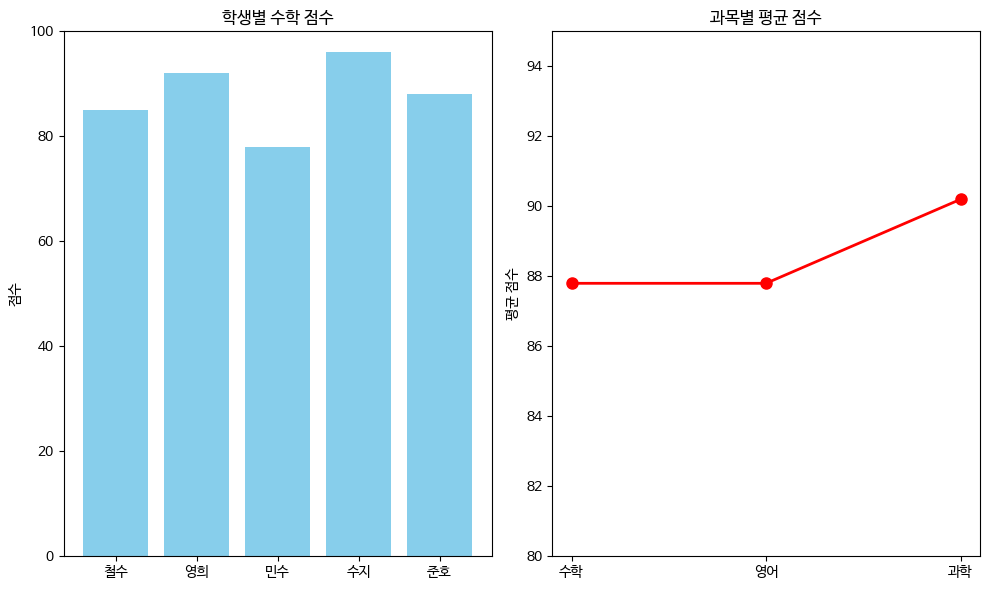

In [7]:
# 1) 막대 그래프 - 학생별 수학 점수
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째
plt.bar(df['이름'], df['수학'], color='skyblue')
plt.title('학생별 수학 점수')
plt.ylabel('점수')
plt.ylim(0, 100)

# 2) 선 그래프 - 과목별 평균 점수
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째
subjects = ['수학', '영어', '과학']
avg_scores = [df[subject].mean() for subject in subjects]
plt.plot(subjects, avg_scores, marker='o', linewidth=2, markersize=8, color='red')
plt.title('과목별 평균 점수')
plt.ylabel('평균 점수')
plt.ylim(80, 95)

plt.tight_layout()  # 그래프들이 겹치지 않게 조정
plt.show()

# =================================================================
# 🎯 간단한 데이터 분석 실습
# =================================================================

In [19]:


print("\n🎯 4단계: 데이터 분석해보기")

# 각 학생의 총점과 평균 계산
df['총점'] = df['수학'] + df['영어'] + df['과학']
df['평균'] = df['총점'] / 3

print("📋 최종 성적표:")
print(df)

# 1등 찾기
top_student = df[df['총점'] == df['총점'].max()]
print(f"\n🏆 1등: {top_student['이름'].values[0]}님 (총점: {top_student['총점'].values[0]}점)")

# 과목별 1등 찾기
print("\n📚 과목별 1등:")
for subject in ['수학', '영어', '과학']:
    best = df[df[subject] == df[subject].max()]
    print(f"  {subject}: {best['이름'].values[0]}님 ({best[subject].values[0]}점)")


🎯 4단계: 데이터 분석해보기
📋 최종 성적표:
   이름  수학  영어  과학   총점         평균
0  철수  85  90  88  263  87.666667
1  영희  92  87  91  270  90.000000
2  민수  78  82  85  245  81.666667
3  수지  96  94  98  288  96.000000
4  준호  88  86  89  263  87.666667

🏆 1등: 수지님 (총점: 288점)

📚 과목별 1등:
  수학: 수지님 (96점)
  영어: 수지님 (94점)
  과학: 수지님 (98점)


### 💰 가상의 주가 데이터 만들기

**시나리오**: 어떤 회사의 주가가 매일 조금씩 오른다고 가정해봅시다.

In [23]:
# 주가 데이터 생성 (100일 동안)
# 설명: i가 0부터 99까지 증가하면서, 매일 약 2원씩 상승 + 랜덤한 변동
주가 = [np.random.randint(10, 50) + i*2 for i in range(100)]
print(주가)
# 처음 5개만 확인
print("처음 5일의 주가:", 주가[:5])
print("\n💡 해석: 주가가 대체로 상승 추세입니다!")

[20, 43, 32, 30, 42, 21, 48, 60, 46, 66, 32, 69, 38, 74, 41, 66, 77, 53, 83, 49, 65, 91, 68, 56, 96, 66, 77, 80, 80, 101, 94, 86, 91, 82, 97, 97, 94, 111, 101, 100, 127, 102, 130, 102, 125, 136, 117, 122, 119, 145, 139, 130, 124, 150, 141, 133, 125, 125, 144, 149, 156, 149, 142, 162, 138, 160, 158, 171, 159, 168, 188, 156, 189, 170, 162, 166, 185, 201, 204, 168, 202, 206, 182, 207, 202, 206, 208, 194, 192, 193, 203, 205, 223, 216, 203, 234, 234, 212, 237, 245]
처음 5일의 주가: [20, 43, 32, 30, 42]

💡 해석: 주가가 대체로 상승 추세입니다!


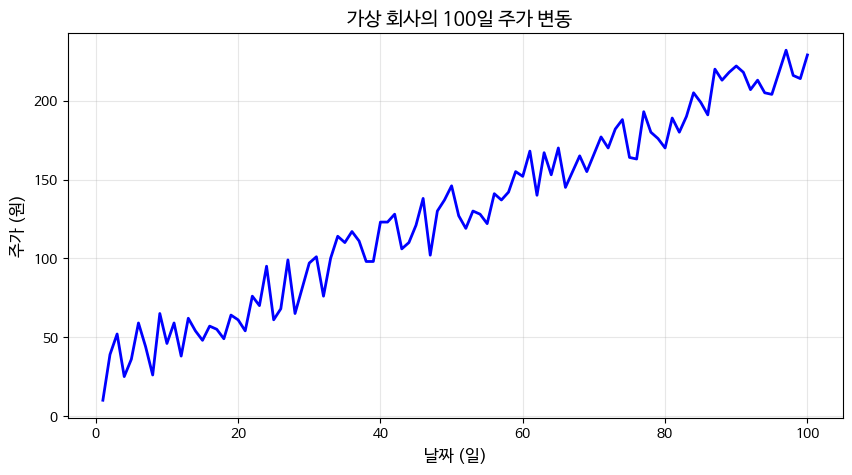


📈 그래프를 보면 오른쪽으로 갈수록 (시간이 지날수록) 주가가 올라갑니다!


In [21]:
# 주가 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 101), 주가, 'b-', linewidth=2)
plt.xlabel('날짜 (일)', fontsize=12)
plt.ylabel('주가 (원)', fontsize=12)
plt.title('🚀 가상 회사의 100일 주가 변동', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print("\n📈 그래프를 보면 오른쪽으로 갈수록 (시간이 지날수록) 주가가 올라갑니다!")

In [6]:
## 📚 헷갈리는 용어 한번에 정리!

print("🎯 딥러닝 용어 사전 (암기 필수!)")
print("="*50)

용어사전 = {
    "독립변수 (X)": "우리가 알고 있는 정보 (예: 날짜, 온도)",
    "종속변수 (Y)": "예측하고 싶은 정보 (예: 주가, 매출)",
    "에폭(epoch)": "전체 데이터를 한 번 학습하는 것",
    "손실(loss)": "예측값과 실제값의 차이 (작을수록 좋음)",
    "가중치": "데이터에 곱해지는 숫자 (학습으로 찾음)",
    "뉴런": "계산을 하는 작은 단위",
    "히든레이어": "입력과 출력 사이의 중간 처리층",
    "MSE": "오차를 제곱해서 평균낸 값"
}

for 용어, 설명 in 용어사전.items():
    print(f"• {용어}: {설명}")

print("="*50)
print("💡 위 용어들을 기억하고 다음으로 넘어가세요!")

🎯 딥러닝 용어 사전 (암기 필수!)
• 독립변수 (X): 우리가 알고 있는 정보 (예: 날짜, 온도)
• 종속변수 (Y): 예측하고 싶은 정보 (예: 주가, 매출)
• 에폭(epoch): 전체 데이터를 한 번 학습하는 것
• 손실(loss): 예측값과 실제값의 차이 (작을수록 좋음)
• 가중치: 데이터에 곱해지는 숫자 (학습으로 찾음)
• 뉴런: 계산을 하는 작은 단위
• 히든레이어: 입력과 출력 사이의 중간 처리층
• MSE: 오차를 제곱해서 평균낸 값
💡 위 용어들을 기억하고 다음으로 넘어가세요!


## 🧠 Step 2: 딥러닝으로 패턴 찾기

### 🎯 우리의 목표
컴퓨터에게 "**날짜를 보고 주가를 예측**"하는 방법을 가르치기!

### 📝 용어 정리 (초심자용)
- **독립변수 (X)**: 우리가 아는 정보 (날짜)
- **종속변수 (Y)**: 예측하고 싶은 정보 (주가)
- 쉬운 예시: 공부시간(X) → 시험점수(Y)

In [25]:
# 데이터를 딥러닝이 이해할 수 있는 형태로 준비
독립 = pd.DataFrame(np.arange(1, 101))  # 1일부터 100일까지
종속 = pd.DataFrame(주가)  # 각 날짜의 주가

print("📊 데이터 형태 확인")
print(f"독립변수(날짜): {독립.shape[0]}개의 데이터, {독립.shape[1]}개의 특징")
print(f"종속변수(주가): {종속.shape[0]}개의 데이터, {종속.shape[1]}개의 특징")
print(f"{독립} = {종속}")
print("\n💡 (100, 1)의 의미: 100개의 데이터, 각각 1개의 값")

📊 데이터 형태 확인
독립변수(날짜): 100개의 데이터, 1개의 특징
종속변수(주가): 100개의 데이터, 1개의 특징
      0
0     1
1     2
2     3
3     4
4     5
..  ...
95   96
96   97
97   98
98   99
99  100

[100 rows x 1 columns] =       0
0    20
1    43
2    32
3    30
4    42
..  ...
95  234
96  234
97  212
98  237
99  245

[100 rows x 1 columns]

💡 (100, 1)의 의미: 100개의 데이터, 각각 1개의 값


### 🤖 TensorFlow 소개

**TensorFlow란?**
- Google이 만든 딥러닝 도구
- 마치 '레고 블록'처럼 모델을 조립할 수 있음
- 무료로 사용 가능!

In [8]:
import tensorflow as tf
print(f"TensorFlow 버전: {tf.__version__}")
print("✅ TensorFlow 준비 완료!")

TensorFlow 버전: 2.19.0
✅ TensorFlow 준비 완료!


### 🏗️ 딥러닝 모델 만들기

**모델 = 수학 공식을 찾는 기계**

우리가 찾고 싶은 것: `주가 = a × 날짜 + b`
- a: 하루에 얼마나 오르는지 (기울기)
- b: 시작 주가 (절편)

In [11]:
print("Y = AX + B 뜻 알아보기")
print("-" * 30)

print("🔤 각 문자의 의미:")
print("Y = 결과 (우리가 알고 싶은 값)")
print("X = 입력 (우리가 가진 정보)")
print("A = 기울기 (X가 1 증가할 때 Y가 얼마나 증가하는지)")
print("B = y절편 (X가 0일 때 Y값)")

print("\n🍕 피자 예제로 바꿔보면:")
print("Y = 피자 가격")
print("X = 피자 크기(인치)")
print("A = 인치당 가격 (기울기)")
print("B = 기본 가격 (고정비용)")

Y = AX + B 뜻 알아보기
------------------------------
🔤 각 문자의 의미:
Y = 결과 (우리가 알고 싶은 값)
X = 입력 (우리가 가진 정보)
A = 기울기 (X가 1 증가할 때 Y가 얼마나 증가하는지)
B = y절편 (X가 0일 때 Y값)

🍕 피자 예제로 바꿔보면:
Y = 피자 가격
X = 피자 크기(인치)
A = 인치당 가격 (기울기)
B = 기본 가격 (고정비용)


# =================================================================
# 📊 피자 데이터로 A, B 찾기
# =================================================================

In [13]:
print("\n📊 2단계: 실제 데이터에서 A, B 찾기")
print("-" * 30)

# 피자 데이터
크기 = [8, 10, 12, 14, 16]  # X
가격 = [8000, 12000, 16000, 20000, 24000]  # Y

print("주어진 데이터:")
for i in range(len(크기)):
    print(f"{크기[i]}인치 → {가격[i]:,}원")

# A (기울기) 계산하기
print(f"\n🔍 A (기울기) 찾기:")
print("기울기 = (Y의 변화량) / (X의 변화량)")

for i in range(1, len(크기)):
    x변화 = 크기[i] - 크기[i-1]
    y변화 = 가격[i] - 가격[i-1]
    기울기 = y변화 / x변화
    print(f"{크기[i-1]}→{크기[i]}인치: {y변화:,}원 ÷ {x변화}인치 = {기울기:,}원/인치")

A = 2000  # 모든 구간에서 동일
print(f"\n✅ A (기울기) = {A:,}원/인치")
print("→ 인치당 2,000원씩 증가!")

# B (y절편) 계산하기
print(f"\n🔍 B (y절편) 찾기:")
print("Y = AX + B를 B에 대해 정리하면:")
print("B = Y - AX")

# 첫 번째 점 사용 (8인치, 8000원)
B = 가격[0] - A * 크기[0]
print(f"B = {가격[0]:,} - {A:,} × {크기[0]}")
print(f"B = {가격[0]:,} - {A * 크기[0]:,}")
print(f"B = {B:,}")

print(f"\n✅ B (y절편) = {B:,}원")



📊 2단계: 실제 데이터에서 A, B 찾기
------------------------------
주어진 데이터:
8인치 → 8,000원
10인치 → 12,000원
12인치 → 16,000원
14인치 → 20,000원
16인치 → 24,000원

🔍 A (기울기) 찾기:
기울기 = (Y의 변화량) / (X의 변화량)
8→10인치: 4,000원 ÷ 2인치 = 2,000.0원/인치
10→12인치: 4,000원 ÷ 2인치 = 2,000.0원/인치
12→14인치: 4,000원 ÷ 2인치 = 2,000.0원/인치
14→16인치: 4,000원 ÷ 2인치 = 2,000.0원/인치

✅ A (기울기) = 2,000원/인치
→ 인치당 2,000원씩 증가!

🔍 B (y절편) 찾기:
Y = AX + B를 B에 대해 정리하면:
B = Y - AX
B = 8,000 - 2,000 × 8
B = 8,000 - 16,000
B = -8,000

✅ B (y절편) = -8,000원


# =================================================================
# 📈 공식 완성하고 예측하기
# =================================================================


In [14]:
print(f"\n📈 3단계: 완성된 공식")
print("-" * 30)

print(f"🎯 피자 가격 공식:")
print(f"가격 = {A:,} × 크기 + ({B:,})")
print(f"Y = {A}X + {B}")

print(f"\n🔮 예측해보기:")

# 18인치 예측
X_예측 = 18
Y_예측 = A * X_예측 + B
print(f"18인치 피자 가격 = {A:,} × {X_예측} + ({B:,})")
print(f"                = {A * X_예측:,} + ({B:,})")
print(f"                = {Y_예측:,}원")

# 다른 크기들도 예측
예측_크기들 = [15, 20, 25]
print(f"\n다른 크기들:")
for 크기_예측 in 예측_크기들:
    가격_예측 = A * 크기_예측 + B
    print(f"{크기_예측}인치 → {가격_예측:,}원")


📈 3단계: 완성된 공식
------------------------------
🎯 피자 가격 공식:
가격 = 2,000 × 크기 + (-8,000)
Y = 2000X + -8000

🔮 예측해보기:
18인치 피자 가격 = 2,000 × 18 + (-8,000)
                = 36,000 + (-8,000)
                = 28,000원

다른 크기들:
15인치 → 22,000원
20인치 → 32,000원
25인치 → 42,000원


# =================================================================
# 📊 그래프로 이해하기
# =================================================================


📊 4단계: 그래프로 보기


/tmp/ipython-input-483399371.py:63: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


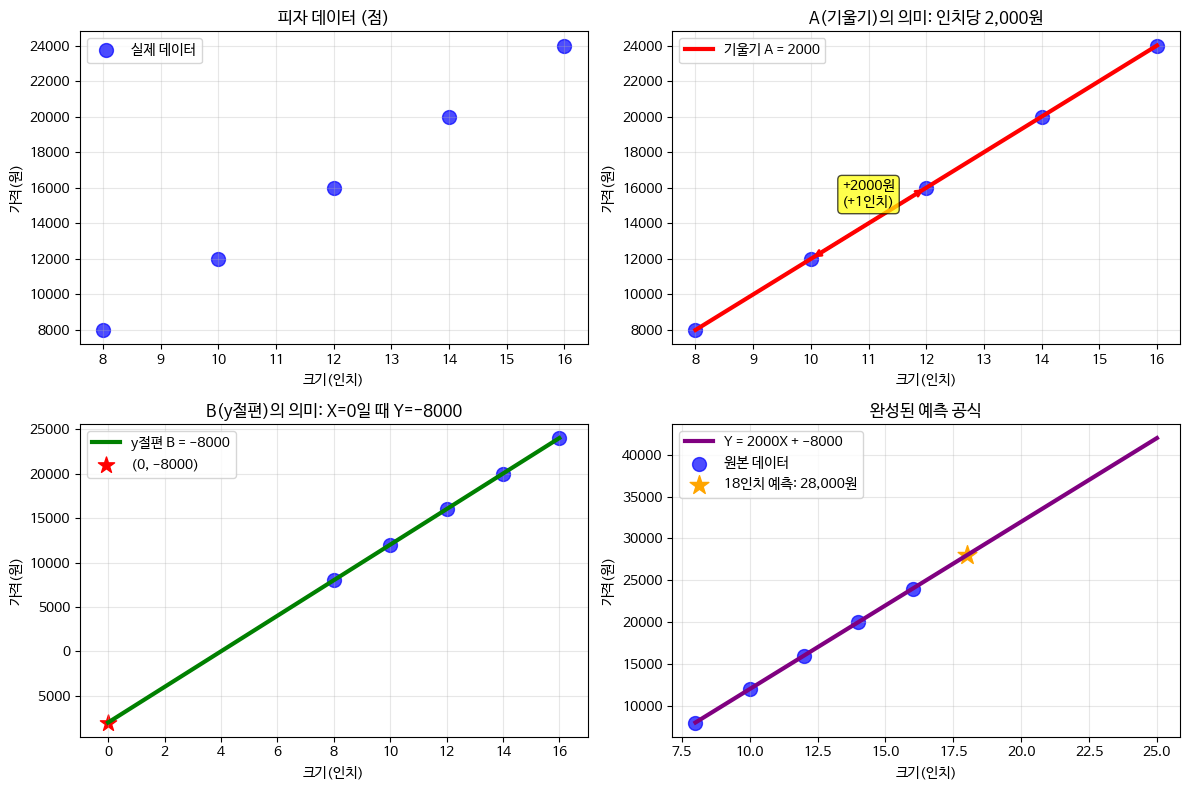

In [15]:
print(f"\n📊 4단계: 그래프로 보기")

plt.figure(figsize=(12, 8))

# 원본 데이터 점들
plt.subplot(2, 2, 1)
plt.scatter(크기, 가격, color='blue', s=100, alpha=0.7, label='실제 데이터')
plt.title('피자 데이터 (점)')
plt.xlabel('크기(인치)')
plt.ylabel('가격(원)')
plt.grid(True, alpha=0.3)
plt.legend()

# A의 의미 (기울기)
plt.subplot(2, 2, 2)
x_line = np.array([8, 16])
y_line = A * x_line + B
plt.plot(x_line, y_line, 'r-', linewidth=3, label=f'기울기 A = {A}')
plt.scatter(크기, 가격, color='blue', s=100, alpha=0.7)

# 기울기 표시
plt.annotate('', xy=(12, A*12+B), xytext=(10, A*10+B),
            arrowprops=dict(arrowstyle='<->', color='red', lw=2))
plt.text(11, A*11+B+1000, f'+{A}원\n(+1인치)', ha='center',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.title(f'A(기울기)의 의미: 인치당 {A:,}원')
plt.xlabel('크기(인치)')
plt.ylabel('가격(원)')
plt.grid(True, alpha=0.3)
plt.legend()

# B의 의미 (y절편)
plt.subplot(2, 2, 3)
x_extended = np.array([0, 16])
y_extended = A * x_extended + B
plt.plot(x_extended, y_extended, 'g-', linewidth=3, label=f'y절편 B = {B}')
plt.scatter(크기, 가격, color='blue', s=100, alpha=0.7)
plt.scatter([0], [B], color='red', s=150, marker='*', label=f'(0, {B})')

plt.title(f'B(y절편)의 의미: X=0일 때 Y={B}')
plt.xlabel('크기(인치)')
plt.ylabel('가격(원)')
plt.xlim(-1, 17)
plt.grid(True, alpha=0.3)
plt.legend()

# 완성된 공식으로 예측
plt.subplot(2, 2, 4)
x_full = np.linspace(8, 25, 100)
y_full = A * x_full + B
plt.plot(x_full, y_full, 'purple', linewidth=3, label=f'Y = {A}X + {B}')
plt.scatter(크기, 가격, color='blue', s=100, alpha=0.7, label='원본 데이터')
plt.scatter([18], [Y_예측], color='orange', s=200, marker='*',
           label=f'18인치 예측: {Y_예측:,}원')

plt.title('완성된 예측 공식')
plt.xlabel('크기(인치)')
plt.ylabel('가격(원)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# =================================================================
# 🎓다른 예제들로 더 이해하기
# =================================================================

In [16]:
print(f"\n🎓 5단계: 다른 예제들")
print("-" * 30)

print("💡 예제 1: 택시 요금")
print("Y = 택시 요금, X = 거리(km)")
print("Y = 1000X + 3000")
print("A = 1000 (km당 1000원)")
print("B = 3000 (기본료 3000원)")
print("5km 택시 요금 = 1000×5 + 3000 = 8000원")

print(f"\n💡 예제 2: 핸드폰 요금")
print("Y = 월 요금, X = 데이터 사용량(GB)")
print("Y = 2000X + 20000")
print("A = 2000 (GB당 2000원)")
print("B = 20000 (기본료 20000원)")
print("10GB 사용시 = 2000×10 + 20000 = 40000원")

print(f"\n💡 예제 3: 몸무게와 키")
print("Y = 몸무게(kg), X = 키(cm)")
print("Y = 0.9X - 100")
print("A = 0.9 (cm당 0.9kg 증가)")
print("B = -100 (키 0cm일 때 -100kg, 현실적이지 않지만 수학적 공식)")
print("170cm인 사람 몸무게 예상 = 0.9×170 - 100 = 53kg")


🎓 5단계: 다른 예제들
------------------------------
💡 예제 1: 택시 요금
Y = 택시 요금, X = 거리(km)
Y = 1000X + 3000
A = 1000 (km당 1000원)
B = 3000 (기본료 3000원)
5km 택시 요금 = 1000×5 + 3000 = 8000원

💡 예제 2: 핸드폰 요금
Y = 월 요금, X = 데이터 사용량(GB)
Y = 2000X + 20000
A = 2000 (GB당 2000원)
B = 20000 (기본료 20000원)
10GB 사용시 = 2000×10 + 20000 = 40000원

💡 예제 3: 몸무게와 키
Y = 몸무게(kg), X = 키(cm)
Y = 0.9X - 100
A = 0.9 (cm당 0.9kg 증가)
B = -100 (키 0cm일 때 -100kg, 현실적이지 않지만 수학적 공식)
170cm인 사람 몸무게 예상 = 0.9×170 - 100 = 53kg


In [17]:
# =================================================================
# 🏆 정리
# =================================================================

print(f"\n🏆 Y = AX + B 완전 정리")
print("="*50)

print("🎯 핵심 포인트:")
print("1. Y = 우리가 예측하고 싶은 값")
print("2. X = 우리가 가진 정보")
print("3. A = X가 1 증가할 때 Y의 증가량 (기울기)")
print("4. B = X가 0일 때 Y의 값 (y절편)")

print(f"\n🍕 피자 예제 요약:")
print(f"가격 = 2000 × 크기 + (-8000)")
print(f"→ 인치당 2000원씩 증가")
print(f"→ 18인치 = 2000×18-8000 = 28000원")

print(f"\n💡 머신러닝에서:")
print("컴퓨터가 데이터를 보고 A와 B를 자동으로 찾아내는 것!")
print("우리는 그냥 결과를 확인하면 됨!")


🏆 Y = AX + B 완전 정리
🎯 핵심 포인트:
1. Y = 우리가 예측하고 싶은 값
2. X = 우리가 가진 정보
3. A = X가 1 증가할 때 Y의 증가량 (기울기)
4. B = X가 0일 때 Y의 값 (y절편)

🍕 피자 예제 요약:
가격 = 2000 × 크기 + (-8000)
→ 인치당 2000원씩 증가
→ 18인치 = 2000×18-8000 = 28000원

💡 머신러닝에서:
컴퓨터가 데이터를 보고 A와 B를 자동으로 찾아내는 것!
우리는 그냥 결과를 확인하면 됨!

🎉 이제 Y = AX + B 완전 정복!


In [9]:
# 🏗️ 모델 설계 (초보자를 위한 상세 설명)
print("🔨 모델을 만들어봅시다!\n")

# 1단계: 입력층 만들기
X = tf.keras.layers.Input(shape=[1])
print("1️⃣ 입력층: 날짜 1개를 받습니다")

# 2단계: 출력층 만들기
Y = tf.keras.layers.Dense(1)(X)
print("2️⃣ 출력층: 주가 1개를 예측합니다")

# 3단계: 모델 조립
model = tf.keras.models.Model(X, Y)
print("3️⃣ 모델 조립 완료!")

# 4단계: 학습 방법 설정
model.compile(loss='mse')
print("4️⃣ 학습 방법 설정 완료!")
print("\n💡 MSE = 예측값과 실제값의 차이를 제곱한 평균")
print("   (차이가 작을수록 좋은 모델!)")

🔨 모델을 만들어봅시다!

1️⃣ 입력층: 날짜 1개를 받습니다
2️⃣ 출력층: 주가 1개를 예측합니다
3️⃣ 모델 조립 완료!
4️⃣ 학습 방법 설정 완료!

💡 MSE = 예측값과 실제값의 차이를 제곱한 평균
   (차이가 작을수록 좋은 모델!)


### 📚 모델 학습시키기

**학습 = 반복 연습**
- 사람이 구구단을 외우듯이
- 컴퓨터도 여러 번 반복해서 패턴을 학습합니다!

In [10]:
# 먼저 조용히 10000번 학습 (verbose=0은 출력 안 함)
print("🏃 열심히 학습 중... (1,000번 반복)")
model.fit(독립, 종속, epochs=1000, verbose=0)
print("✅ 첫 번째 학습 완료!\n")

# 마지막 10번만 보여주기
print("📊 마지막 10번의 학습 과정:")
model.fit(독립, 종속, epochs=10)
print("\n💡 loss가 작아질수록 예측이 정확해집니다!")

🏃 열심히 학습 중... (1,000번 반복)
✅ 첫 번째 학습 완료!

📊 마지막 10번의 학습 과정:
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 241.2854 
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 237.9687 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 248.8714 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 234.3568 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 246.8557 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 254.1693 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 226.7008 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 235.2547 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 229.5563 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 236.4788 

💡 loss가 작아질수록 예측이 정확해집니다!


### 🔮 예측해보기

학습이 끝났으니 이제 예측을 해봅시다!

In [11]:
# 50일째 주가 예측
예측값_50일 = model.predict(np.array([[50]]))[0][0]
실제값_50일 = 주가[49]  # 리스트는 0부터 시작하므로 49번 인덱스

print("🔮 50일째 주가 예측 결과")
print(f"예측값: {예측값_50일:.2f}원")
print(f"실제값: {실제값_50일}원")
print(f"오차: {abs(예측값_50일 - 실제값_50일):.2f}원")

# 40일째도 예측해보기
print("\n🔮 40일째 주가 예측 결과")
예측값_40일 = model.predict(np.array([[40]]))[0][0]
실제값_40일 = 주가[39]
print(f"예측값: {예측값_40일:.2f}원")
print(f"실제값: {실제값_40일}원")
print(f"오차: {abs(예측값_40일 - 실제값_40일):.2f}원")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
🔮 50일째 주가 예측 결과
예측값: 120.83원
실제값: 130원
오차: 9.17원

🔮 40일째 주가 예측 결과
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
예측값: 97.40원
실제값: 113원
오차: 15.60원


### 🔍 모델이 찾은 공식 확인하기

In [12]:
# 모델이 학습한 가중치(weights) 확인
weights = model.get_weights()
기울기 = weights[0][0][0]
절편 = weights[1][0]

print("📐 모델이 찾은 공식:")
print(f"주가 = {기울기:.3f} × 날짜 + {절편:.3f}")
print("\n💡 해석:")
print(f"- 하루에 약 {기울기:.1f}원씩 상승")
print(f"- 첫날 주가는 약 {절편:.1f}원")

# 공식으로 직접 계산해보기
print("\n🧮 50일째를 공식으로 계산:")
계산값 = 기울기 * 50 + 절편
print(f"{기울기:.3f} × 50 + {절편:.3f} = {계산값:.2f}원")

📐 모델이 찾은 공식:
주가 = 2.343 × 날짜 + 3.692

💡 해석:
- 하루에 약 2.3원씩 상승
- 첫날 주가는 약 3.7원

🧮 50일째를 공식으로 계산:
2.343 × 50 + 3.692 = 120.83원


### 📈 예측 결과 시각화

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib

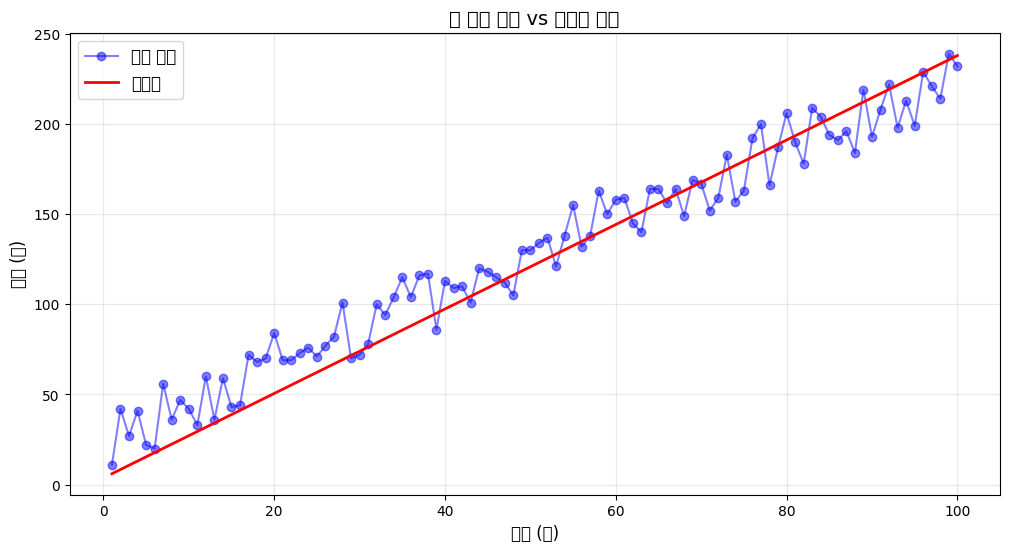

📊 빨간선(예측)이 파란점(실제)의 중간을 지나가면 성공!


In [13]:
# 실제 주가와 예측선 비교
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 101), 주가, 'bo-', label='실제 주가', alpha=0.5)
plt.plot(np.arange(1, 101),
         기울기 * np.arange(1, 101) + 절편,
         'r-', label='예측선', linewidth=2)

plt.xlabel('날짜 (일)', fontsize=12)
plt.ylabel('주가 (원)', fontsize=12)
plt.title('🎯 실제 주가 vs 딥러닝 예측', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print("📊 빨간선(예측)이 파란점(실제)의 중간을 지나가면 성공!")

In [14]:
## 🧩 문제 1: 기본 예측 문제

print("📝 문제 1: 피자 가격 예측")
print("피자 크기(인치)로 가격(원)을 예측해보세요")
print()

# 문제 데이터
피자크기 = [8, 10, 12, 14, 16]
피자가격 = [8000, 12000, 16000, 20000, 24000]

print("주어진 데이터:")
for i in range(len(피자크기)):
    print(f"{피자크기[i]}인치 → {피자가격[i]}원")

print()
print("💭 예상해보세요: 18인치 피자는 얼마일까요?")


📝 문제 1: 피자 가격 예측
피자 크기(인치)로 가격(원)을 예측해보세요

주어진 데이터:
8인치 → 8000원
10인치 → 12000원
12인치 → 16000원
14인치 → 20000원
16인치 → 24000원

💭 예상해보세요: 18인치 피자는 얼마일까요?
답을 생각해보셨나요? 엔터를 누르세요...1000


'1000'

In [28]:
# 정답 코드

독립_피자 = pd.DataFrame(피자크기)
종속_피자 = pd.DataFrame(피자가격)

model_피자 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
model_피자.compile(loss='mse')

model_피자.fit(독립_피자, 종속_피자, epochs=1000, verbose=0)

예측가격 = model_피자.predict(np.array([[18]], dtype=float))[0][0]
print(f"✅ 정답: 18인치 피자 예상 가격은 {예측가격:,.0f}원입니다!")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


초기 가중치: -1.354426
초기 편향: 0.000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
✅ 정답: 18인치 피자 예상 가격은 -5원입니다!
💡 규칙: 인치당 약 2000원씩 증가하는 패턴이네요!
학습 후 가중치: -0.345282
학습 후 편향: 1.009130


## 📏 Step 3: 오차 이해하기

### ❓ 오차란?
- 예측값과 실제값의 차이
- 오차가 작을수록 좋은 모델!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/

📊 오차 분석
평균 오차: 12.91원
최대 오차: 35.91원
최소 오차: 0.40원


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


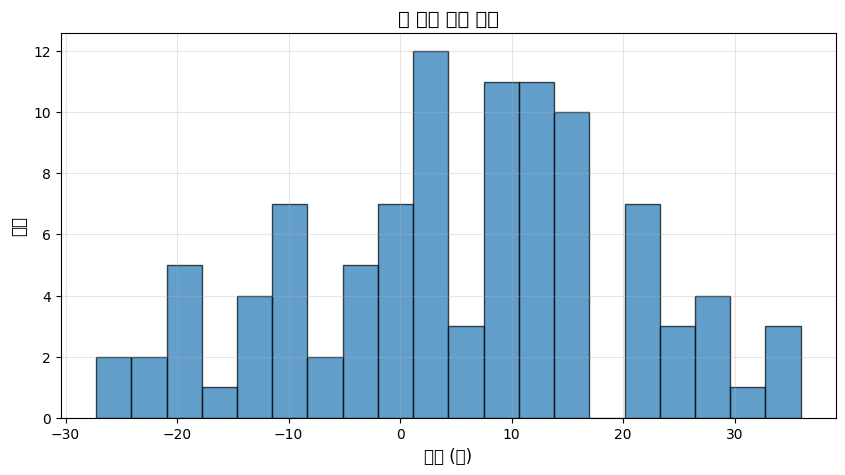


💡 대부분의 오차가 0 근처에 모여있으면 좋은 모델입니다!


In [29]:
# 모든 날짜의 예측값 구하기
예측값_전체 = model.predict(독립)

# 오차 계산
오차값 = 종속.values - 예측값_전체

print("📊 오차 분석")
print(f"평균 오차: {np.mean(np.abs(오차값)):.2f}원")
print(f"최대 오차: {np.max(np.abs(오차값)):.2f}원")
print(f"최소 오차: {np.min(np.abs(오차값)):.2f}원")

# 오차 분포 그래프
plt.figure(figsize=(10, 5))
plt.hist(오차값, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('오차 (원)', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.title('📊 예측 오차 분포', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print("\n💡 대부분의 오차가 0 근처에 모여있으면 좋은 모델입니다!")

## 🧮 Step 4: MSE (평균제곱오차) 이해하기

### 📐 MSE란?
- Mean Squared Error의 약자
- 오차를 제곱해서 평균낸 값
- **왜 제곱?** 큰 오차를 더 크게 벌주기 위해!

In [30]:
# MSE 직접 계산해보기
오차값의제곱 = 오차값 ** 2


총합 = float(오차값의제곱.sum())
MSE = 총합 / 100

print("🧮 MSE 계산 과정")
print("1️⃣ 각 오차를 제곱")
print(f"   예시: 오차 5 → 5² = 25")
print(f"   예시: 오차 -3 → (-3)² = 9")
print("\n2️⃣ 모든 제곱값을 더함")
print(f"   총합: {총합:.2f}")
print("\n3️⃣ 데이터 개수로 나눔")
print(f"   MSE = {총합:.2f} ÷ 100 = {MSE:.2f}")
print("\n💡 MSE가 작을수록 예측이 정확합니다!")

🧮 MSE 계산 과정
1️⃣ 각 오차를 제곱
   예시: 오차 5 → 5² = 25
   예시: 오차 -3 → (-3)² = 9

2️⃣ 모든 제곱값을 더함
   총합: 24284.12

3️⃣ 데이터 개수로 나눔
   MSE = 24284.12 ÷ 100 = 242.84

💡 MSE가 작을수록 예측이 정확합니다!


In [31]:
## 🧩 문제 2: 오차 비교 문제

print("📝 문제 2: 어떤 모델이 더 좋을까요?")
print()

# 두 모델의 예측 결과
실제값 = [100, 200, 300, 400, 500]
모델A_예측 = [95, 205, 290, 410, 495]
모델B_예측 = [120, 180, 320, 380, 520]

print("실제값:", 실제값)
print("모델A 예측:", 모델A_예측)
print("모델B 예측:", 모델B_예측)
print()
print("💭 어떤 모델이 더 좋을까요? A? B?")
input("생각해보셨나요? 엔터를 누르세요...")

📝 문제 2: 어떤 모델이 더 좋을까요?

실제값: [100, 200, 300, 400, 500]
모델A 예측: [95, 205, 290, 410, 495]
모델B 예측: [120, 180, 320, 380, 520]

💭 어떤 모델이 더 좋을까요? A? B?
생각해보셨나요? 엔터를 누르세요...A


'A'

In [32]:
# 정답 계산
오차A = np.mean(np.abs(np.array(실제값) - np.array(모델A_예측)))
오차B = np.mean(np.abs(np.array(실제값) - np.array(모델B_예측)))

print(f"✅ 정답:")
print(f"모델A 평균 오차: {오차A:.1f}")
print(f"모델B 평균 오차: {오차B:.1f}")
print(f"{'모델A' if 오차A < 오차B else '모델B'}가 더 좋습니다!")

✅ 정답:
모델A 평균 오차: 7.0
모델B 평균 오차: 20.0
모델A가 더 좋습니다!


In [ ]:
## 🧮 수학이 무서운 당신을 위한 쉬운 설명

print("😰 '수학 무서워요...' 하는 분들을 위한 코너")
print("="*50)

print("📐 1. 기울기(가중치)란?")
print("   🏔️  가파른 산 = 기울기 큼 = 급격히 변화")
print("   🏠  평평한 길 = 기울기 작음 = 천천히 변화")
print()

print("📊 2. MSE를 왜 제곱할까?")
print("   💡 이유 1: 음수를 양수로 만들기 위해")
print("        -3 오차 → (-3)² = 9")
print("        +3 오차 → (+3)² = 9")
print("   💡 이유 2: 큰 오차를 더 크게 벌주기 위해")
print("        1 오차 → 1² = 1")
print("        10 오차 → 10² = 100 (100배 벌점!)")
print()

print("🤖 3. 히든레이어가 하는 일")
print("   마치 요리사가 재료를 섞는 것처럼")
print("   입력 재료들을 섞고 조합해서")
print("   더 복잡한 맛(패턴)을 만들어냄")
print()

/tmp/ipython-input-3744042370.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3744042370.py:24: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3744042370.py:24: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3744042370.py:24: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3744042370.py:24: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3744042370.py:24: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3744042370.py:24: UserWarning: Glyph 53372 (\N{HANGUL SYLLABLE KEUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/

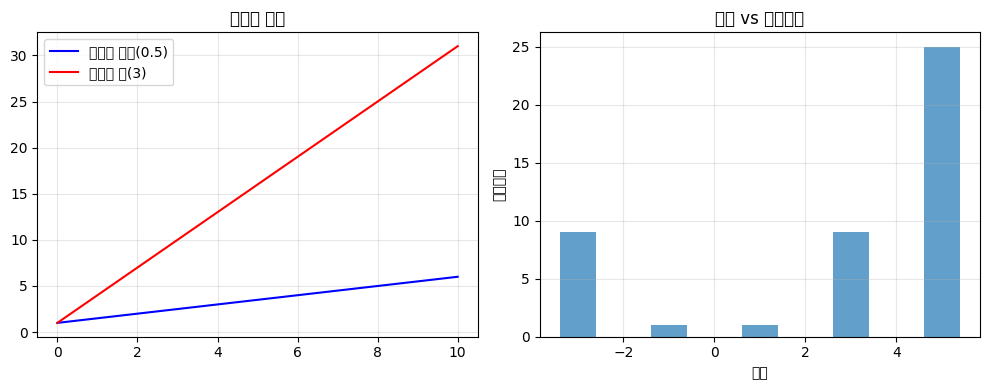

✅ 이제 수학이 조금 친근해졌나요?


In [33]:
# 시각적 예시
x = np.linspace(0, 10, 100)
기울기_작음 = 0.5 * x + 1
기울기_큼 = 3 * x + 1

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, 기울기_작음, 'b-', label='기울기 작음(0.5)')
plt.plot(x, 기울기_큼, 'r-', label='기울기 큼(3)')
plt.legend()
plt.title('기울기 비교')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
오차값 = [-3, -1, 1, 3, 5]
제곱오차 = [x**2 for x in 오차값]
plt.bar(오차값, 제곱오차, alpha=0.7)
plt.title('오차 vs 제곱오차')
plt.xlabel('오차')
plt.ylabel('제곱오차')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ 이제 수학이 조금 친근해졌나요?")

## 🎓 Step 5: 최소제곱법 (수학적 배경)

### 📚 이론 설명
딥러닝 내부에서는 **최소제곱법**이라는 수학적 방법을 사용합니다.

**최소제곱법이란?**
- 오차의 제곱을 가장 작게 만드는 직선 찾기
- 수학 공식이 있지만, 딥러닝이 자동으로 계산해줍니다!

### 🎯 직관적 이해
여러 점들 사이를 지나는 **가장 적절한 직선**을 찾는 방법

In [34]:
# 최소제곱법 공식으로 직접 계산 (참고용)
print("📐 최소제곱법 공식 (참고만 하세요!)")
print("\ny = ax + b 에서:")
print("a = (n×Σxy - Σx×Σy) / (n×Σx² - (Σx)²)")
print("b = (Σx²×Σy - Σx×Σxy) / (n×Σx² - (Σx)²)")
print("\n😅 복잡해 보이지만 딥러닝이 알아서 계산합니다!")

# 실제 계산 (이해 안 되어도 괜찮습니다!)
n = 100
x = 독립.values.flatten()
y = 종속.values.flatten()

a_계산 = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - np.sum(x)**2)
b_계산 = (np.sum(x**2) * np.sum(y) - np.sum(x) * np.sum(x * y)) / (n * np.sum(x**2) - np.sum(x)**2)

print(f"\n🔍 수학 공식으로 계산한 결과:")
print(f"a (기울기) = {a_계산:.3f}")
print(f"b (절편) = {b_계산:.3f}")
print(f"\n🤖 딥러닝이 찾은 결과:")
print(f"a (기울기) = {기울기:.3f}")
print(f"b (절편) = {절편:.3f}")

📐 최소제곱법 공식 (참고만 하세요!)

y = ax + b 에서:
a = (n×Σxy - Σx×Σy) / (n×Σx² - (Σx)²)
b = (Σx²×Σy - Σx×Σxy) / (n×Σx² - (Σx)²)

😅 복잡해 보이지만 딥러닝이 알아서 계산합니다!

🔍 수학 공식으로 계산한 결과:
a (기울기) = 2.014
b (절편) = 25.784

🤖 딥러닝이 찾은 결과:
a (기울기) = 2.343
b (절편) = 3.692

✅ 거의 같은 값을 찾았습니다!


## 🏗️ Step 6: 히든 레이어 (Hidden Layer) 소개

### 🧠 히든 레이어란?
- 입력과 출력 사이의 **중간 처리 층**
- 복잡한 패턴을 찾기 위한 비밀 무기!

### 🍔 햄버거 비유
```
빵 (입력층)
패티 (히든 레이어 1)
치즈 (히든 레이어 2)
야채 (히든 레이어 3)
빵 (출력층)
```
재료(레이어)가 많을수록 맛있는(정확한) 햄버거(모델)!

### 📊 복잡한 데이터 준비

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50613 (\N{HANGUL SYLLABLE EOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


🏢 가상의 비즈니스 데이터 생성



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

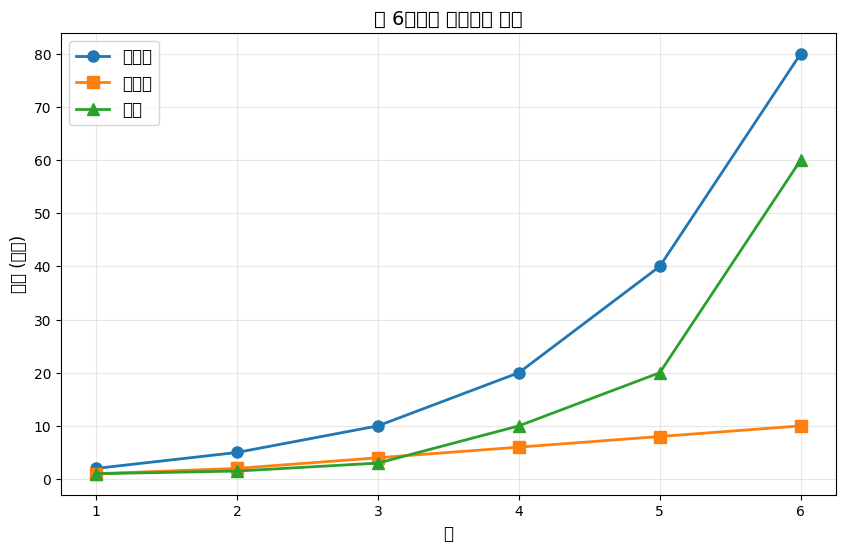

💡 목표: 매출액과 광고액으로 순익을 예측하기!


In [35]:
# 더 복잡한 비즈니스 데이터 생성
print("🏢 가상의 비즈니스 데이터 생성\n")

매출액 = [2, 5, 10, 20, 40, 80]
광고액 = [1, 2, 4, 6, 8, 10]
순익 = [1, 1.5, 3, 10, 20, 60]

# 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 7), 매출액, 'o-', label='매출액', linewidth=2, markersize=8)
plt.plot(np.arange(1, 7), 광고액, 's-', label='광고액', linewidth=2, markersize=8)
plt.plot(np.arange(1, 7), 순익, '^-', label='순익', linewidth=2, markersize=8)

plt.xlabel('월', fontsize=12)
plt.ylabel('금액 (억원)', fontsize=12)
plt.title('📈 6개월간 비즈니스 지표', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print("💡 목표: 매출액과 광고액으로 순익을 예측하기!")

In [36]:
# 데이터 준비
독립_복잡 = pd.DataFrame({
    '매출액': 매출액,
    '광고액': 광고액
})
종속_복잡 = pd.DataFrame({
    '순익': 순익
})

print("📊 데이터 구조")
print("\n독립변수 (입력):")
print(독립_복잡)
print("\n종속변수 (출력):")
print(종속_복잡)
print("\n💡 이제 2개의 정보(매출액, 광고액)를 사용합니다!")

📊 데이터 구조

독립변수 (입력):
   매출액  광고액
0    2    1
1    5    2
2   10    4
3   20    6
4   40    8
5   80   10

종속변수 (출력):
     순익
0   1.0
1   1.5
2   3.0
3  10.0
4  20.0
5  60.0

💡 이제 2개의 정보(매출액, 광고액)를 사용합니다!


### 🎯 히든 레이어가 있는 모델 만들기

In [37]:
# 히든 레이어가 있는 모델 (초보자용 설명)
print("🏗️ 히든 레이어가 있는 모델 만들기\n")

# 모델 구조:
# 입력(2개) → 히든레이어(3개 뉴런) → 출력(1개)

X = tf.keras.layers.Input(shape=[2])  # 2개 입력 (매출액, 광고액)
print("1️⃣ 입력층: 2개의 정보를 받습니다")

H = tf.keras.layers.Dense(3, activation='swish')(X)  # 히든레이어
print("2️⃣ 히든레이어: 3개의 뉴런이 복잡한 패턴을 찾습니다")
print("   (뉴런 = 작은 계산 단위)")

Y = tf.keras.layers.Dense(1)(H)  # 출력층
print("3️⃣ 출력층: 1개의 예측값(순익)을 만듭니다")

model_복잡 = tf.keras.models.Model(X, Y)
model_복잡.compile(loss='mse')
print("\n✅ 복잡한 모델 준비 완료!")

🏗️ 히든 레이어가 있는 모델 만들기

1️⃣ 입력층: 2개의 정보를 받습니다
2️⃣ 히든레이어: 3개의 뉴런이 복잡한 패턴을 찾습니다
   (뉴런 = 작은 계산 단위)
3️⃣ 출력층: 1개의 예측값(순익)을 만듭니다

✅ 복잡한 모델 준비 완료!


In [38]:
# 모델 학습
print("🏃 모델 학습 시작...")
model_복잡.fit(독립_복잡, 종속_복잡, epochs=5000, verbose=0)
print("✅ 학습 완료!\n")

# 마지막 10번 확인
model_복잡.fit(독립_복잡, 종속_복잡, epochs=10)

🏃 모델 학습 시작...
✅ 학습 완료!

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.8430
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.8427
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.8425
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.8422
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.8419
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.8416
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.8414
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.8411
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.8408
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.8406


In [ ]:
print("🔮 새로운 데이터로 예측해보기\n")

테스트_입력 = np.array([[10, 4]])  # numpy array로 변환
예측_순익 = model_복잡.predict(테스트_입력)[0][0]

print(f"입력: 매출액 10억, 광고액 4억")
print(f"예측 순익: {예측_순익:.2f}억원")
print("\n💡 히든 레이어가 복잡한 관계를 학습했습니다!")

In [ ]:
# 예측 vs 실제 비교
예측값_복잡 = model_복잡.predict(독립_복잡)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 7), 예측값_복잡, 'ro-', label='예측 순익', linewidth=2, markersize=10)
plt.plot(np.arange(1, 7), 종속_복잡, 'bo-', label='실제 순익', linewidth=2, markersize=10)

plt.xlabel('월', fontsize=12)
plt.ylabel('순익 (억원)', fontsize=12)
plt.title('🎯 히든 레이어 모델의 예측 성능', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# 오차 표시
for i in range(6):
    plt.plot([i+1, i+1], [예측값_복잡[i][0], 순익[i]], 'k--', alpha=0.3)

plt.show()
print("📊 점선은 예측과 실제의 차이를 보여줍니다")

In [ ]:
## 🧩 문제 3: 히든레이어 설계 문제

print("📝 문제 3: 모델 설계하기")
print("학생의 [수학점수, 영어점수]로 → [과학점수]를 예측")
print()

수학점수 = [80, 70, 90, 60, 85]
영어점수 = [75, 65, 95, 55, 80]
과학점수 = [78, 68, 92, 58, 82]

print("💭 몇 개의 뉴런이 있는 히든레이어가 필요할까요?")
print("1) 2개  2) 5개  3) 10개")
input("답을 선택해보세요...")

In [ ]:
# 실험해보기
뉴런_옵션 = [2, 5, 10]
결과 = []

for 뉴런수 in 뉴런_옵션:
    독립 = pd.DataFrame({'수학': 수학점수, '영어': 영어점수})
    종속 = pd.DataFrame({'과학': 과학점수})

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(뉴런수, activation='relu', input_shape=[2]),
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mse')
    model.fit(독립, 종속, epochs=1000, verbose=0)

    예측 = model.predict(독립)
    오차 = np.mean(np.abs(종속.values - 예측))
    결과.append(오차)
    print(f"{뉴런수}개 뉴런: 평균 오차 {오차:.2f}")

최적_뉴런 = 뉴런_옵션[np.argmin(결과)]
print(f"✅ 이 문제에서는 {최적_뉴런}개 뉴런이 가장 좋네요!")

## 🧪 Step 7: 히든 레이어 실험

### 🔬 실험 1: 뉴런 개수 늘리기

In [ ]:
# 뉴런 개수별 성능 비교
print("🔬 뉴런 개수를 바꿔가며 실험\n")

뉴런_개수_리스트 = [2, 5, 10, 20]
결과_저장 = []

for 뉴런수 in 뉴런_개수_리스트:
    # 모델 만들기
    X = tf.keras.layers.Input(shape=[2])
    H = tf.keras.layers.Dense(뉴런수, activation='swish')(X)
    Y = tf.keras.layers.Dense(1)(H)
    model_실험 = tf.keras.models.Model(X, Y)
    model_실험.compile(loss='mse')

    # 학습
    model_실험.fit(독립_복잡, 종속_복잡, epochs=5000, verbose=0)

    # 예측
    예측 = model_실험.predict(독립_복잡)
    오차 = np.mean(np.abs(종속_복잡.values - 예측))
    결과_저장.append(오차)

    print(f"뉴런 {뉴런수:2d}개: 평균 오차 = {오차:.3f}억원")

print("\n💡 뉴런이 많다고 항상 좋은 것은 아닙니다!")
print("   적절한 개수를 찾는 것이 중요해요.")

### 🔬 실험 2: 히든 레이어 층수 늘리기

In [ ]:
# 히든 레이어 2개 쌓기
print("🏗️ 히든 레이어를 2개 쌓아봅시다\n")

X = tf.keras.layers.Input(shape=[2])
H1 = tf.keras.layers.Dense(5, activation='swish')(X)   # 첫 번째 히든레이어
H2 = tf.keras.layers.Dense(5, activation='swish')(H1)  # 두 번째 히든레이어
Y = tf.keras.layers.Dense(1)(H2)

model_깊은 = tf.keras.models.Model(X, Y)
model_깊은.compile(loss='mse')

print("모델 구조:")
print("입력(2) → 히든1(5) → 히든2(5) → 출력(1)")
print("\n🏃 학습 중...")

model_깊은.fit(독립_복잡, 종속_복잡, epochs=5000, verbose=0)
print("✅ 학습 완료!")

# 성능 확인
예측_깊은 = model_깊은.predict(독립_복잡)
오차_깊은 = np.mean(np.abs(종속_복잡.values - 예측_깊은))
print(f"\n평균 오차: {오차_깊은:.3f}억원")
print("\n💡 층이 깊을수록 복잡한 패턴을 학습할 수 있습니다!")

## 🌊 Step 8: 매우 복잡한 데이터 다루기

### 🎢 실제와 비슷한 복잡한 데이터

In [ ]:
# 매우 복잡한 데이터 생성 (100개 데이터포인트)
print("🌊 실제와 비슷한 복잡한 데이터 생성\n")

np.random.seed(42)  # 재현 가능한 랜덤

# 계절성과 트렌드가 있는 복잡한 데이터
광고액_복잡 = [np.random.randint(10, 50) + np.log(i*5) * 50 for i in range(1, 101)]
계절성 = [np.sin(i/3)*100 + i*3 + j*2 for i, j in zip(np.arange(1, 101), 광고액_복잡)]
매출액_복잡 = [i**(np.log(np.log(i+1)+1)) + j for i, j in zip(np.arange(1, 101), 계절성)]

# 시각화
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(매출액_복잡, 'b-', alpha=0.7)
plt.title('매출액 추이 (복잡한 패턴)', fontsize=12)
plt.xlabel('기간')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(광고액_복잡, 매출액_복잡, alpha=0.5)
plt.title('광고액 vs 매출액', fontsize=12)
plt.xlabel('광고액')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 매우 복잡한 비선형 관계를 가진 데이터입니다!")

In [ ]:
# 복잡한 데이터용 딥러닝 모델
독립_매우복잡 = pd.DataFrame({
    '계절성': 계절성,
    '광고액': 광고액_복잡
})
종속_매우복잡 = pd.DataFrame({
    '매출액': 매출액_복잡
})

print("🏗️ 복잡한 패턴을 위한 깊은 신경망 구축\n")

# 깊고 넓은 신경망
X = tf.keras.layers.Input(shape=[2])
H = tf.keras.layers.Dense(50, activation='swish')(X)
H = tf.keras.layers.Dense(30, activation='swish')(H)
H = tf.keras.layers.Dense(20, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H)

model_매우복잡 = tf.keras.models.Model(X, Y)
model_매우복잡.compile(loss='mse', optimizer='adam')

print("모델 구조:")
print("입력(2) → 50뉴런 → 30뉴런 → 20뉴런 → 출력(1)")
print("\n🏃 학습 중... (시간이 좀 걸립니다)")

history = model_매우복잡.fit(독립_매우복잡, 종속_매우복잡,
                        epochs=1000, verbose=0,
                        validation_split=0.2)  # 20%는 검증용

print("✅ 학습 완료!")

In [ ]:
# 학습 과정 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='훈련 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.xlabel('에폭')
plt.ylabel('손실(MSE)')
plt.title('학습 과정', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# 예측 결과
예측_매우복잡 = model_매우복잡.predict(독립_매우복잡)

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, 101), 매출액_복잡, 'b-', label='실제', alpha=0.7)
plt.plot(np.arange(1, 101), 예측_매우복잡, 'r-', label='예측', alpha=0.7)
plt.xlabel('기간')
plt.ylabel('매출액')
plt.title('복잡한 패턴 예측 결과', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

오차율 = np.mean(np.abs((종속_매우복잡.values - 예측_매우복잡) / 종속_매우복잡.values)) * 100
print(f"\n📊 평균 예측 오차율: {오차율:.1f}%")
print("\n💡 복잡한 패턴도 딥러닝으로 학습 가능합니다!")

In [ ]:
## ✅ 최종 실력 체크 문제

print("🎯 졸업시험: 종합 문제")
print("="*50)

print("🏪 상황: 편의점 매출 예측")
print("조건: [날씨점수(1-5), 요일(1-7)] → 매출액")

# 문제 데이터
날씨점수 = [3, 5, 2, 4, 1, 5, 3, 4, 2, 5]  # 1:최악, 5:최고
요일 = [1, 2, 3, 4, 5, 6, 7, 1, 2, 3]        # 1:월요일, 7:일요일
매출액 = [50, 80, 30, 70, 20, 120, 60, 65, 35, 85]

print("\n📋 해야할 일:")
체크리스트 = [
    "1. 데이터를 pandas DataFrame으로 만들기",
    "2. 히든레이어 1개(5개 뉴런) 모델 만들기",
    "3. 1000번 학습시키기",
    "4. 날씨점수=4, 요일=6(토요일)일 때 매출 예측하기"
]

for 할일 in 체크리스트:
    print(f"□ {할일}")

print("\n💪 도전해보세요!")



In [ ]:
# 정답 코드
독립_편의점 = pd.DataFrame({
    '날씨점수': 날씨점수,
    '요일': 요일
})
종속_편의점 = pd.DataFrame({
    '매출액': 매출액
})

model_편의점 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=[2]),
    tf.keras.layers.Dense(1)
])

model_편의점.compile(loss='mse')
model_편의점.fit(독립_편의점, 종속_편의점, epochs=1000, verbose=0)

토요일_예측 = model_편의점.predict([[4, 6]])[0][0]

print(f"✅ 정답: 날씨점수 4, 토요일 매출 예상 = {토요일_예측:.0f}만원")
print("🎉 축하합니다! 딥러닝 기초를 마스터했어요!")

# 성과 확인
전체_예측 = model_편의점.predict(독립_편의점)
정확도 = 100 - np.mean(np.abs(종속_편의점.values - 전체_예측) / 종속_편의점.values * 100)
print(f"📊 당신의 모델 정확도: {정확도:.1f}%")

if 정확도 > 80:
    print("🏆 우수! 딥러닝 마스터!")
elif 정확도 > 60:
    print("👍 양호! 기본기 탄탄!")
else:
    print("📚 더 연습이 필요해요!")

## 🎓 핵심 정리와 다음 단계

### ✅ 오늘 배운 내용
1. **딥러닝 기초**: 컴퓨터가 패턴을 스스로 학습
2. **데이터 준비**: 독립변수(입력)와 종속변수(출력)
3. **모델 구축**: 입력층 → (히든레이어) → 출력층
4. **학습 과정**: 반복 학습으로 오차 줄이기
5. **히든 레이어**: 복잡한 패턴을 위한 중간 처리층

### 📚 추천 학습 경로
1. **다음 단계**:
   - CNN (이미지 인식)
   - RNN (시계열 데이터)
   - 실제 데이터셋 활용

2. **연습 과제**:
   - 자신만의 데이터로 예측 모델 만들기
   - 히든 레이어 개수/뉴런 수 실험
   - 다양한 활성화 함수 시도

### 💡 기억할 핵심 개념
- **과적합 주의**: 훈련 데이터에만 너무 잘 맞추면 새 데이터 예측 실패
- **적절한 복잡도**: 문제에 맞는 모델 크기 선택
- **실험과 반복**: 최적의 모델은 여러 시도를 통해 발견

### 🚀 실무 팁
- 히든레이어: 보통 1~4개 사용
- 뉴런 수: 보통 10~200개 사용
- 데이터가 많을수록 복잡한 모델 가능
- 항상 검증 데이터로 성능 확인!

### 📖 추가 학습 자료
- TensorFlow 공식 튜토리얼
- Keras 문서
- 3Blue1Brown 유튜브 (시각적 설명)
- 제주코딩베이스캠프 유튜브

---
🎉 **축하합니다! 딥러닝의 첫 걸음을 성공적으로 떼셨습니다!**